# DSCI6001 6.1 Lecture - Partial Derivatives and the Del Operator

## Assigned Reading: Kreyszig 9.7


## By the End of this Lecture You Will:
1. Be able to write down the definition of the del operator.
2. Be able to write down the definition of the divergence value and describe in your own words what it means.
3. Be able to write down the definition of the gradient and describe in your own words what it means.
4. (Optional) Be able to write down the definition of the curl and describe in your own words what it means.


## More on Partial Derivatives

We've already discussed the partial derivative in passing as a component of the *total derivative* with respect to a single variable, in this case $t$:

$$\frac{dw}{dt} = \frac{\partial w}{\partial x} \frac{dx}{dt} + \frac{\partial w}{\partial y} \frac{dy}{dt} + \frac{\partial w}{\partial z} \frac{dz}{dt} + \cdots$$

But what is the partial derivative, really?

In the end, the partial derivative is truly a much more simple and clear interpretation of what a derivative really is, a slope in a given direction. 

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# initializes the plot
fig = plt.figure()

# this allows access to the axes objects and sets to 3d
ax = fig.gca(projection='3d')

#  
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)

X, Y = np.meshgrid(X, Y)


#define the function z(x, y)
Z = (X**2+X*Y+Y**2)

# plot surface uses the meshgrid to return values of the function at each point

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

# set to see z appropriately rendered
ax.set_zlim(0, 10.)
# manipulate the plotting package so that you can see the center of the graph
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

def z_slice_line(x_val, y_val, x, y):
        return (x-x_val)**2+(x-x_val)*(y-y_val)+(y-y_val)**2


line1 = ax.plot(x, y, z_slice_line(0., 0., x, y), c='green')

fig.colorbar(surf, shrink=0.5, aspect=5)
 
# Get current rotation angle
print(ax.azim)
 
# Set rotation angle to 30 degrees
ax.view_init(azim=150)
plt.show()


In [6]:
import numpy as np
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)

X, Y = np.meshgrid(X, Y)

print Y

[[-2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.   -2.
  -2.   -2.   -2.  ]
 [-1.75 -1.75 -1.75 -1.75 -1.75 -1.75 -1.75 -1.75 -1.75 -1.75 -1.75 -1.75
  -1.75 -1.75 -1.75 -1.75]
 [-1.5  -1.5  -1.5  -1.5  -1.5  -1.5  -1.5  -1.5  -1.5  -1.5  -1.5  -1.5
  -1.5  -1.5  -1.5  -1.5 ]
 [-1.25 -1.25 -1.25 -1.25 -1.25 -1.25 -1.25 -1.25 -1.25 -1.25 -1.25 -1.25
  -1.25 -1.25 -1.25 -1.25]
 [-1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
  -1.   -1.   -1.  ]
 [-0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75
  -0.75 -0.75 -0.75 -0.75]
 [-0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5
  -0.5  -0.5  -0.5  -0.5 ]
 [-0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25
  -0.25 -0.25 -0.25 -0.25]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.  ]
 [ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
   0.25  0.25  0.25  0.25

The slice line about (0,0) tells everything that we need to know about the surface, except the slope in each direction. If we take the slice of $z$ at $y=0$ we get this plot:

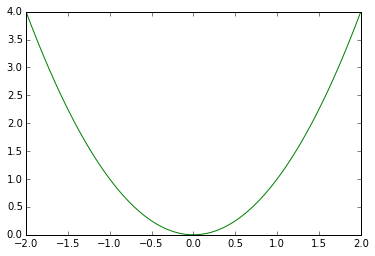

In [11]:
fig = plt.figure()
ax = fig.gca()
z_slice_0 = x**2
line1 = ax.plot(x, z_slice_0, c='green')


$\dfrac{\partial z}{\partial x} = 2x+y$, so the slope at $x=1$, $y=0$ is going to be $2x = 2$...

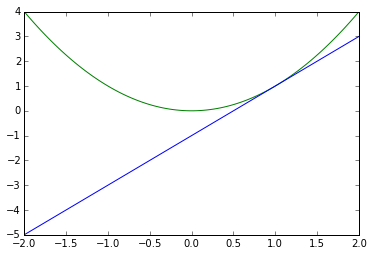

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca()

# Recalling that z = x**2+2xy+y**2 ... about y=0, z = x**2...

z_slice_0 = x**2

#at x=0, z=0, for x = 1, the tangent falls at z = 1; 
#use partial d to get the slope. Slope is 2x = 2.

# z-z_0 = (x-x_0)**2

# dz/dx = z-z_0 = 2(x-x_0)

#z-1 = 2(x-1)

#z = 2x-1

slope_1_0 = 2*x-1
line1 = ax.plot(x, z_slice_0, c='green')
line1 = ax.plot(x, slope_1_0, c='blue')


...If we take the slice of $z$ at $y=2$ we get this plot:

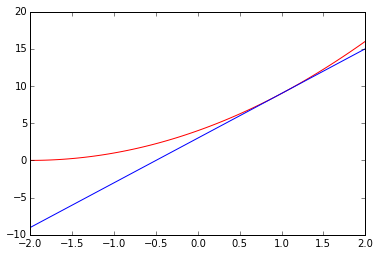

In [14]:
fig = plt.figure()
ax = fig.gca()
z_slice_1 = x**2+4*x+4

#at x=0, z=4, for x = 1, the tangent falls at z = 9; 
#use partial d to get the slope. Slope is 2x+4 = 6.
#z-9 = 6(x-1)
#z = 6x+3
slope_1_2 = 6*(x)+3

line1 = ax.plot(x, z_slice_1, c='red')
line1 = ax.plot(x, slope_1_2, c='blue')


## The Gradient

Getting slopes in one direction is super, but what if we want to know the slope of a 3-d plot in general? For example, what if we are standing on a hill and we want to know exactly what direction a ball might roll in?

We can use the quiver plot in numpy to visualize this direction at any point on the plot, automatically. 

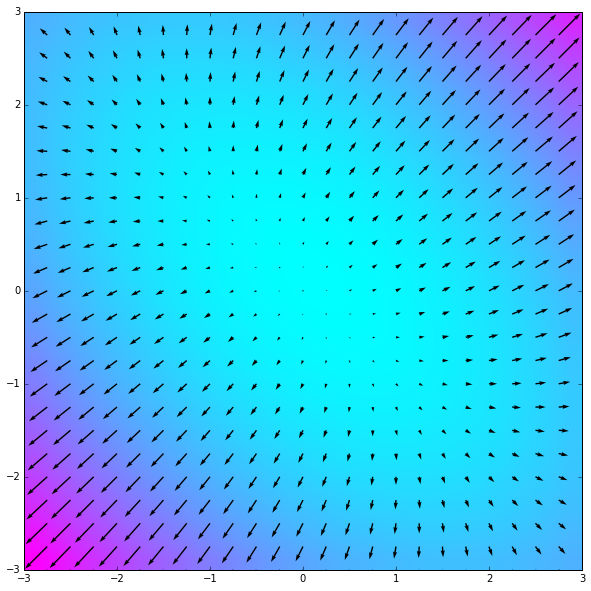

In [220]:

import numpy as np
import pylab as plt
fig, ax =  plt.subplots(figsize=(10, 10), dpi=300)
# Create some sample data
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(X, Y)
Z  = X**2 + Y*X +Y**2
V, U = np.gradient(Z)
#plt.imshow(Z, cmap='cool')
#plt.colorbar()
#widths = np.linspace(0, 2, Z.size)
ax.quiver(X,Y,U, V)
ax.imshow(Z, origin='lower', extent = [-3,3,-3,3],cmap='cool')
#plt.quiver(X,Y,Z,width=.002,linewidth=1, linewidths=widths,headaxislength=5 )

plt.show()

The big question is: how do you get those vectors? How are they computed? This leads us to the first of the important vector calculus operations, the *gradient* (named above in the code). The gradient of function is simply the slope in each direction of the basis, with respect to the variable cardinal to that direction, hence for a function $f$ in $\mathbb{R}^3$, we would have

$$\vec{grad(f)} = \begin{bmatrix}\dfrac{\partial f}{\partial x}\\\dfrac{\partial f}{\partial y}\\\dfrac{\partial f}{\partial z}\end{bmatrix}$$

## QUIZ:
If a ball was placed at $(1, 1, 1)$ on a hill with the height function: $f(x,y,z) = e^{\dfrac{-(2x^{2}+3y^{2})}{50}}$, which direction does it roll in?
What happens if there is a $z$ component in the height?

## The Del Operator

The gradient vector can be seen as a product of a **scalar-valued** function with a vector. That vector is the del operator, in $\mathbb{R}^3$

$$\vec{\nabla} = \dfrac{\partial }{\partial x}\vec{e_{x}}+\dfrac{\partial }{\partial y}\vec{e_{y}}+\dfrac{\partial }{\partial z}\vec{e_{z}} = \begin{bmatrix}\dfrac{\partial }{\partial x}\\\dfrac{\partial }{\partial y}\\\dfrac{\partial }{\partial z}\end{bmatrix}$$

In $\mathbb{R}^n$:

$$\vec{\nabla} = \dfrac{\partial }{\partial x_{1}}\vec{e_{1}}+\dfrac{\partial }{\partial x_{2}}\vec{e_{2}}+\cdots+\dfrac{\partial }{\partial x_{n}}\vec{e_{n}} = \begin{bmatrix}\dfrac{\partial }{\partial x_{1}}\\\dfrac{\partial }{\partial x_{2}}\\ \vdots \\ \dfrac{\partial }{\partial x_{n}}\end{bmatrix} = \sum_{i=1}^{n}\dfrac{\partial}{\partial x_{i}}\vec{e_{i}}$$

The del operator is directional, just like a matrix or vector. Therefore, $f\vec{\nabla}$ does **not** equal $\vec{\nabla}f$ in most cases.

We **define the gradient operation**, $\vec{grad(f)} = \vec{\nabla}f$. For *scalar valued functions only*. It is also called the **directional derivative of f**.

## Properties of the gradient operation

There are two particular properties of the the gradient operation worth mentioning. For example, the first property is much like the standard product rule:

$$\vec{\nabla}(fg) = f\vec{\nabla}g +g\vec{\nabla}f$$

The second is much less friendly, one that includes sums of components perpendicular to $\vec{u}$ and $\vec{v}$:

$$\vec{\nabla}(\vec{u} \cdot \vec{v}) = (\vec{u} \cdot \vec{\nabla})\vec{v}+(\vec{v} \cdot \vec{\nabla})\vec{u} + \vec{u} \times (\vec{\nabla} \times \vec{v}) + \vec{v} \times (\vec{\nabla} \times \vec{u})$$


Also Note:
$(\vec{x} \cdot \vec{\nabla})$ is a **scalar**.



## The Divergence

We have three types of (inner) products we can do with a vector, scalar multiplication, inner products, and cross products. Likewise, we have three operations we can perform with the del operator. One of which is the gradient, the vector product of del. 

The **scalar** product of del, divergence, is obtained by the dot product of del with a vector-valued function. 

$$div(\vec{f}) = \vec{\nabla} \cdot \vec{f} = \dfrac{\partial f}{\partial x}+\dfrac{\partial f}{\partial y}+\dfrac{\partial f}{\partial z}$$

This means we get a **scalar**. 

What is the divergence? It is the measure of the rate to which the vectors of the function's vector field increase at a given point. It is also a measure of the tendency of vectors to converge on or repel away from a given point. 

$div(f)$ has two pretty interesting properties:

$$ \vec{\nabla} \cdot( g\vec{f}) = g(\vec{\nabla} \cdot \vec{f})+ \vec{f} \cdot (\vec{\nabla}g)$$

$$\vec{\nabla} \cdot (\vec{u} \times \vec{v}) =  \vec{v} \cdot (\vec{\nabla} \times \vec{u}) - \vec{u} \cdot (\vec{\nabla} \times \vec{v}) $$


## QUIZ:
How would we create a function to provide us the divergence at each point in a matplotlib plot?


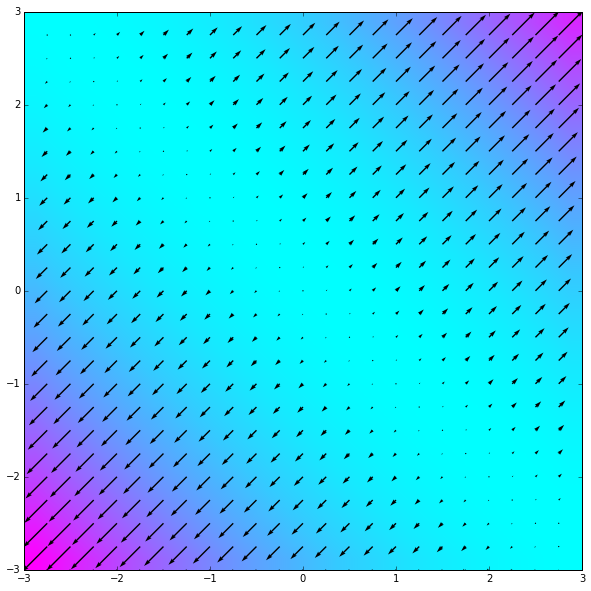

In [17]:
def divergence(F):
    """ compute the divergence of n-D scalar field `F` """
    
    Q = reduce(np.add,np.gradient(F))
    
    return Q, Q.T

fig, ax =  plt.subplots(figsize=(10, 10), dpi=300)
# Create some sample data
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(X, Y)
Z  = X**2 + 2*Y*X +Y**2
V, U = divergence(Z)
#plt.imshow(Z, cmap='cool')
#plt.colorbar()
#widths = np.linspace(0, 2, Z.size)
ax.quiver(X,Y,U, V)
ax.imshow(Z, origin='lower', extent = [-3,3,-3,3],cmap='cool')
#plt.quiver(X,Y,Z,width=.002,linewidth=1, linewidths=widths,headaxislength=5 )

plt.show()

The divergence doesn't point anywhere, it just determines the magnitude of the vectors that fall along the points of the plane.

## The Curl

There's one more del operation that keeps popping up, the one involving the cross product of the del operator:

$$curl(\vec{f}) = \vec{\nabla} \times \vec{f}$$

This thing, called the curl, describes the degree to which vectors of a vector field (meaning a vector-valued function) turn on themselves - so, how curly a field is.

This means that the curl is **only defined where the cross product is defined.** It is computed as the cross product with the vector function $\vec{f}$,

$$\begin{vmatrix}e_{1} & e_{2} & e_{3} \\ \dfrac{\partial}{\partial x_{1}} & \dfrac{\partial}{\partial x_{2}} & \dfrac{\partial}{\partial x_{3}} \\
f_{x} & f_{y} & f_{z}\end{vmatrix}$$

In [228]:
#don't worry about this part
from sympy.physics.vector import ReferenceFrame
from sympy.physics.vector import curl
R = ReferenceFrame('R')
F = (R[0]**2 +R[0]*R[1]+R[2]**2)*R.z
G = curl(F, R)
print G

R_x*R.x + (-2*R_x - R_y)*R.y


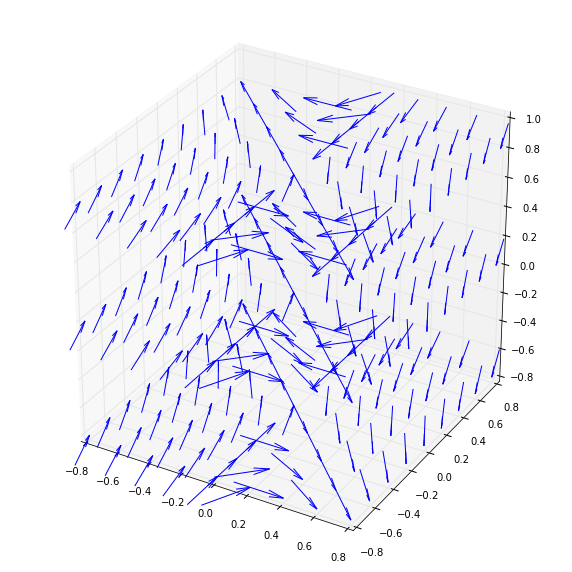

In [230]:

fig = plt.figure(figsize=(10, 10), dpi=300)
ax = fig.gca(projection='3d')
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = x
v = (-2*x-y)
w = 0


ax.quiver(x, y, z, u, v, w,length=0.3)
#ax.imshow(Z, origin='lower', extent = [-3,3,-3,3],cmap='cool')
#plt.quiver(X,Y,Z,width=.002,linewidth=1, linewidths=widths,headaxislength=5 )

plt.show()

The curl has two properties worth noting:

$$ \vec{\nabla} \times ( g\vec{f}) = (\vec{\nabla} g) \times \vec{f} + g(\vec{\nabla} \times \vec{f})$$

$$\vec{\nabla} \times (\vec{u} \times \vec{v}) =  \vec{u}(\vec{\nabla} \cdot \vec{v}) - \vec{v}(\vec{\nabla} \cdot \vec{u}) + (\vec{v} \cdot \vec{\nabla}) \vec{u} - (\vec{u} \cdot \vec{\nabla}) \vec{v} $$

## Assigned Problems:

9.7 : 3, 5, 7, 9, 11, 21, 23, 27, 29, 33, 35. Pick one of these functions to plot and use my above code.